# Lab 8: Exploring Ensemble Algorithms 🌲🎯

**Course:** COMPX310 - Machine Learning  
**Due Date:** Monday, December 01, 23:59 pm  
**Worth:** 3 marks (3% of total grade)

---

**Student Name:** Guo Zimo <br>
**Student ID:**  20233006327 <br>
**Partner Name (if applicable):**  
**Partner ID (if applicable):**  

---

## Table of Contents
1. [Introduction: What are Ensemble Methods?](#intro)
2. [Understanding the Fashion-MNIST Dataset](#dataset)
3. [Random Forests Explained Simply](#random-forests)
4. [AdaBoost Explained Simply](#adaboost)
5. [Pre-tasks: Loading and Visualizing Data](#pretasks)
6. [Task A: Random Forest Classifier (1 mark)](#task-a)
7. [Task B: AdaBoost Classifier (1 mark)](#task-b)
8. [Discussion Questions (1 mark)](#discussion)

---
## 1. Introduction: What are Ensemble Methods? <a name="intro"></a>

### Let's Start with a Simple Story! 🎯

Imagine you want to know: **"Will it rain tomorrow?"**

**Option 1:** You ask ONE weather expert, and they say "Yes"  

**Option 2:** You ask FIVE weather experts:
- Expert 1 says: "Yes" ✅
- Expert 2 says: "Yes" ✅
- Expert 3 says: "No" ❌
- Expert 4 says: "Yes" ✅
- Expert 5 says: "Yes" ✅

Then you take a vote: **4 said "Yes" and 1 said "No"** → So your final answer is "Yes"

**Which option do you trust more?** Most people would say Option 2! ✅

This is exactly what **Ensemble Methods** do in machine learning!

---

### What is an Ensemble Method?

**Simple Definition:** 

Instead of using just **ONE** model to make predictions, we use **MANY** models and combine their predictions!

**Why is this better?**
- ❌ One model might make mistakes
- ✅ But when many models vote together, the mistakes get cancelled out!
- 🎉 The final prediction is usually more accurate

---

### Real-Life Example: Diagnosing a Disease 🏥

Think about going to a hospital:

**❌ Bad Approach:** Only ONE doctor looks at your test results and makes a diagnosis

**✅ Better Approach:** THREE doctors **independently** look at your test results:
- Doctor 1: "You have Disease A"
- Doctor 2: "You have Disease A"
- Doctor 3: "You are healthy"

The hospital takes a vote → **2 out of 3** say "Disease A" → Final diagnosis: "Disease A"

This is safer and more reliable! The same logic works for machine learning.

---

### Two Ways to Build Ensembles (That We'll Learn Today)

#### **Method 1: Random Forest** 🌲🌲🌲 (Like Asking Independent Experts)
- Build many decision trees **independently**
- Each tree looks at **different parts** of the data
- All trees **vote** on the final answer
- **Think:** Like asking 100 different doctors who each studied different groups of patients

#### **Method 2: AdaBoost** 🎯 (Like Learning from Your Mistakes)
- Build decision trees **one by one**
- Each new tree **focuses on fixing mistakes** of previous trees
- **Think:** Like a student taking multiple practice exams, each time focusing more on the questions they got wrong before

Let's learn each method in detail! 🚀

---
## 2. Understanding the Fashion-MNIST Dataset <a name="dataset"></a>

### What is Fashion-MNIST? 👕👗👟

Fashion-MNIST is a dataset of **clothing images**. It's like a photo album of different fashion items!

### Think of it Like This:

Imagine you work at an online clothing store. Customers upload photos of clothes, and your job is to automatically label them:
- "This is a T-shirt!"
- "This is a pair of trousers!"
- "This is a sneaker!"

That's exactly what we'll teach our machine learning models to do! 🎯

---

### Dataset Details:

**📊 Size:**
- **Training images:** 60,000 (like a textbook with 60,000 examples)
- **Test images:** 10,000 (like a final exam with 10,000 questions)

**📐 Image Size:**
- Each image is **28 × 28 pixels** (very small!)
- Black and white (grayscale)
- When we flatten it: **28 × 28 = 784 features**

**🏷️ Number of Classes:** 10 different types of clothing

---

### The 10 Classes of Clothing:

| Label Number | Clothing Item | Example |
|--------------|---------------|----------|
| 0 | T-shirt/top | 👕 |
| 1 | Trouser | 👖 |
| 2 | Pullover | 🧥 |
| 3 | Dress | 👗 |
| 4 | Coat | 🧥 |
| 5 | Sandal | 👡 |
| 6 | Shirt | 👔 |
| 7 | Sneaker | 👟 |
| 8 | Bag | 👜 |
| 9 | Ankle boot | 👢 |

---

### Why Use This Dataset?

1. **📚 Great for Learning:** It's more interesting than handwritten digits (the old MNIST dataset)
2. **🌍 Real-World Application:** Many e-commerce websites use similar technology!
3. **⚖️ Balanced:** Each class has the same number of images (6,000 per class)
4. **🎓 Good Challenge:** Not too easy, not too hard - perfect for learning!

---

### Visual Understanding:

Each image is made of **pixels** (tiny dots). Each pixel has a value from **0 to 255**:
- **0** = completely black ⬛
- **255** = completely white ⬜
- **128** = gray ⬛⬜

Our job: Teach the computer to recognize patterns in these pixels! 🤖

---
## 3. Random Forests Explained Simply 🌲 <a name="random-forests"></a>

### What is a Random Forest?

A Random Forest is like having **many decision trees** working together as a team!

### Let's Start with a Simple Analogy: The Class President Election 🗳️

Imagine your class wants to choose a class president. There are 3 candidates: Alice, Bob, and Carol.

**❌ Bad Way:** Ask only ONE student who they want, and that's the winner.
- Problem: That one student might be biased or have wrong information!

**✅ Good Way (Random Forest Way):** Ask 100 students to vote:
- 60 students vote for Alice ✅
- 25 students vote for Bob
- 15 students vote for Carol
- **Winner: Alice!** (majority vote)

Random Forest does the same thing with decision trees! 🌲

---

### Real Example with Numbers:

Let's say we build a Random Forest with **100 trees** to classify a dress image:

- 85 trees say: "DRESS" 👗
- 10 trees say: "COAT" 🧥
- 5 trees say: "PULLOVER" 🧥

**Final prediction:** DRESS (85% confidence) ✅

---

### Important Parameters You'll Use:

#### **1. `n_estimators`** (Number of Trees)
- How many trees in your forest?
- More trees = more accurate (but slower)
- Example: `n_estimators=30` means 30 trees

#### **2. `max_depth`** (How Deep Each Tree Can Grow)
- How many questions can each tree ask?
- `max_depth=4` → Each tree asks max 4 questions
- `max_depth=None` → Trees can grow as deep as they want
- **Deeper = more complex, but might overfit!**

#### **3. `max_features`** (How Many Features to Consider at Each Split)
- How many pixels to look at when making each decision?
- `max_features=4` → Look at only 4 random features
- `max_features='sqrt'` → Look at √784 ≈ 28 features
- `max_features=None` → Look at all 784 features

#### **4. `oob_score`** (Out-of-Bag Score)
- Remember: Each tree only sees ~2/3 of the data (because of random sampling)
- The remaining ~1/3 can be used to test that tree!
- This gives us a "free" accuracy score without using the test set
- Set `oob_score=True` to enable this

---

### Why is Random Forest So Good? 🌟

1. **🎯 Accurate:** Usually performs very well
2. **💪 Robust:** Doesn't overfit easily
3. **🚀 Fast:** Can train many trees in parallel
4. **📊 Feature Importance:** Tells you which pixels are most important!

### Quick Summary:

**Random Forest = Many Trees + Random Data + Random Features + Voting** 🌲🗳️

---
## 4. AdaBoost Explained Simply 🎯 <a name="adaboost"></a>

### What is AdaBoost?

AdaBoost stands for **"Adaptive Boosting"**. Think of it as a **smart learning system** that learns from its mistakes!

---

### Let's Use a School Exam Analogy 📝

Imagine you're preparing for a big exam:

**❌ Bad Strategy:** Study everything equally, take the exam once

**✅ AdaBoost Strategy:**

**Round 1:** Take a practice test
- You get 10 questions → You answer 7 correctly ✅, 3 wrong ❌
- Note: Questions 3, 7, 9 were hard for you

**Round 2:** Take another practice test, but this time:
- The test has MORE questions similar to 3, 7, 9 (the ones you got wrong!)
- You focus on those hard topics
- Now you get 2 of them right! ✅

**Round 3:** Take another practice test
- Again, focus MORE on the questions you still get wrong
- Keep improving!

**Final Exam:** Combine all your knowledge from all practice rounds → You do great! 🎉

This is exactly how AdaBoost works!

---

### Real Example with Numbers:

Let's classify a sneaker image using AdaBoost with 5 weak learners:

| Learner | Prediction | Accuracy | Vote Weight |
|---------|------------|----------|-------------|
| 1 | SNEAKER 👟 | 65% | 0.65 |
| 2 | ANKLE BOOT 👢 | 55% | 0.55 |
| 3 | SNEAKER 👟 | 75% | 0.75 |
| 4 | SNEAKER 👟 | 70% | 0.70 |
| 5 | SNEAKER 👟 | 60% | 0.60 |

**Weighted votes:**
- SNEAKER: 0.65 + 0.75 + 0.70 + 0.60 = **2.70** ✅
- ANKLE BOOT: 0.55 = **0.55**

**Final prediction:** SNEAKER! 👟

---

### Key Concept: "Weak Learner" 🌱

**What is a weak learner?**
- A very simple model that's only **slightly better than random guessing**
- Like a tree with only 1 or 2 questions
- Individually: Not very smart ❌
- Combined: Very powerful! ✅

**Analogy:** 
- One elementary school student → can't solve hard math
- 100 elementary school students working together → can solve complex problems!

---

### Important Parameters:

#### **`n_estimators`** (Number of Weak Learners)
- How many weak learners to train?
- More learners = better accuracy (but slower and might overfit)
- Example: `n_estimators=300` means 300 weak learners

#### **`learning_rate`**
- How much to trust each new learner?
- Lower = more careful, safer (like studying slowly)
- Higher = faster learning but might overfit (like cramming)
- Default is usually 1.0

---

### Difference Between Random Forest and AdaBoost:

| Feature | Random Forest 🌲 | AdaBoost 🎯 |
|---------|------------------|-------------|
| **Training** | All trees at once (parallel) | One by one (sequential) |
| **Focus** | Random data samples | Hard-to-classify examples |
| **Trees** | Can be deep and complex | Usually very simple (stumps) |
| **Voting** | Equal voting | Weighted voting |
| **Speed** | Faster (parallel) | Slower (sequential) |
| **Analogy** | Ask 100 independent experts | Learn from mistakes repeatedly |

---

### Why Use AdaBoost? 🌟

1. **🎯 Focuses on Hard Cases:** Great for tricky examples
2. **💪 Powerful:** Can achieve high accuracy
3. **🧠 Smart:** Adapts to the data
4. **📊 Interpretable:** Can see which examples are hardest

### Quick Summary:

**AdaBoost = Train Simple Models + Focus on Mistakes + Weighted Voting** 🎯📚

---
## 5. Pre-tasks: Loading and Visualizing Data <a name="pretasks"></a>

Now let's get our hands dirty with code! 💻

In [1]:
# Import all the libraries we need
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


### Load the Fashion-MNIST Dataset

The dataset is already split into training and test sets for us. We just need to load it and reshape the images.

In [4]:
import gzip
import numpy as np
import os

# Set the path to your folder (CHANGE THIS!)
data_folder = "F:/HNU/COMPX310/Lab/Lab8/fashion_mnist"  # ← Change to your folder path

# Function to load MNIST-style data
def load_mnist(path, kind='train'):
    """Load MNIST/Fashion-MNIST data from local files"""
    
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')
    
    # Load labels
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    
    # Load images
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)
    
    return images, labels

# Load training data
X_train, y_train = load_mnist(data_folder, kind='train')

# Load test data
X_test, y_test = load_mnist(data_folder, kind='t10k')

# Reshape from (N, 28, 28) to (N, 784)
X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

print("✅ Dataset loaded successfully from local folder!")
print(f"Training images: {X_train.shape[0]} images, each with {X_train.shape[1]} pixels")
print(f"Test images: {X_test.shape[0]} images, each with {X_test.shape[1]} pixels")
print(f"Training labels: {y_train.shape}")
print(f"Test labels: {y_test.shape}")

✅ Dataset loaded successfully from local folder!
Training images: 60000 images, each with 784 pixels
Test images: 10000 images, each with 784 pixels
Training labels: (60000,)
Test labels: (10000,)


### Define Helper Functions

These functions will help us visualize our results.

In [5]:
# Define class labels for Fashion-MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Helper function to plot matrices (images, confusion matrices, feature importance)
def plot_matrix(m, target_names=None, cm=plt.cm.viridis, shape=None, title=""):
    """
    Plot a matrix as a heatmap.
    
    Parameters:
    - m: The matrix to plot
    - target_names: Labels for axes (optional)
    - cm: Colormap to use
    - shape: Shape to reshape the matrix to (optional)
    - title: Title for the plot
    """
    if shape is None:
        shape = m.shape
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(np.reshape(m, shape), cmap=cm)
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, ha='left')
        plt.yticks(tick_marks, target_names)
    
    plt.title(title, fontsize=14, pad=20)
    fig.colorbar(cax)
    plt.tight_layout()
    plt.show()

print("✅ Helper functions defined!")

✅ Helper functions defined!


### Visualize the First 3 Training Images

Let's see what the Fashion-MNIST images actually look like!

👀 Here are the first 3 images from our training data:


Image #1: This is a Ankle boot
Label number: 9


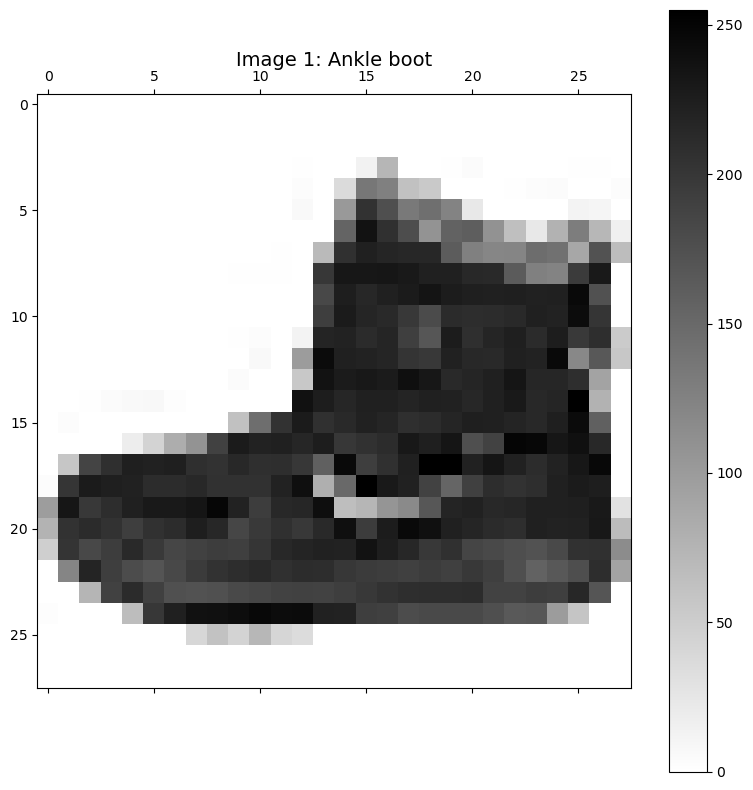


Image #2: This is a T-shirt/top
Label number: 0


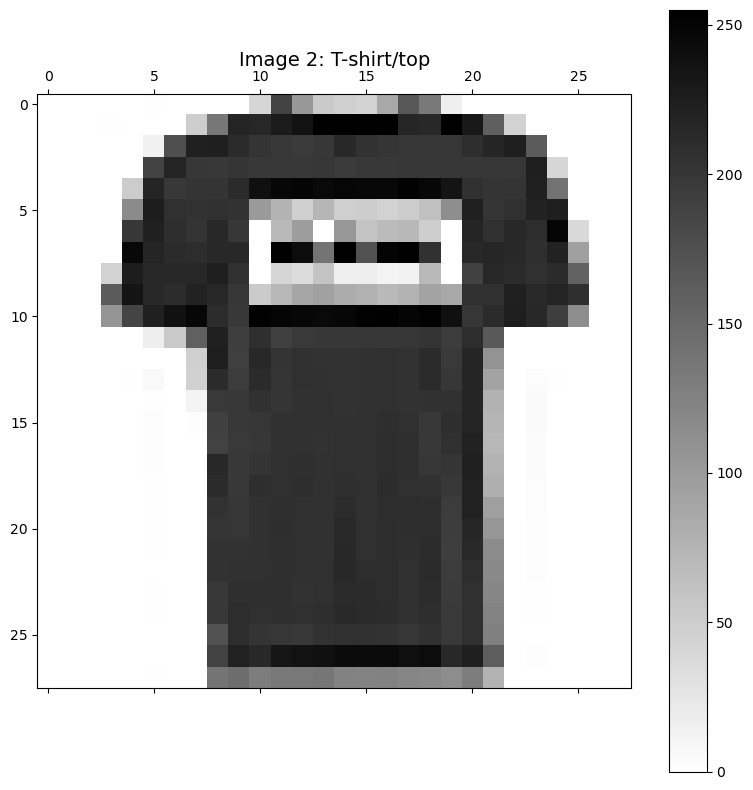


Image #3: This is a T-shirt/top
Label number: 0


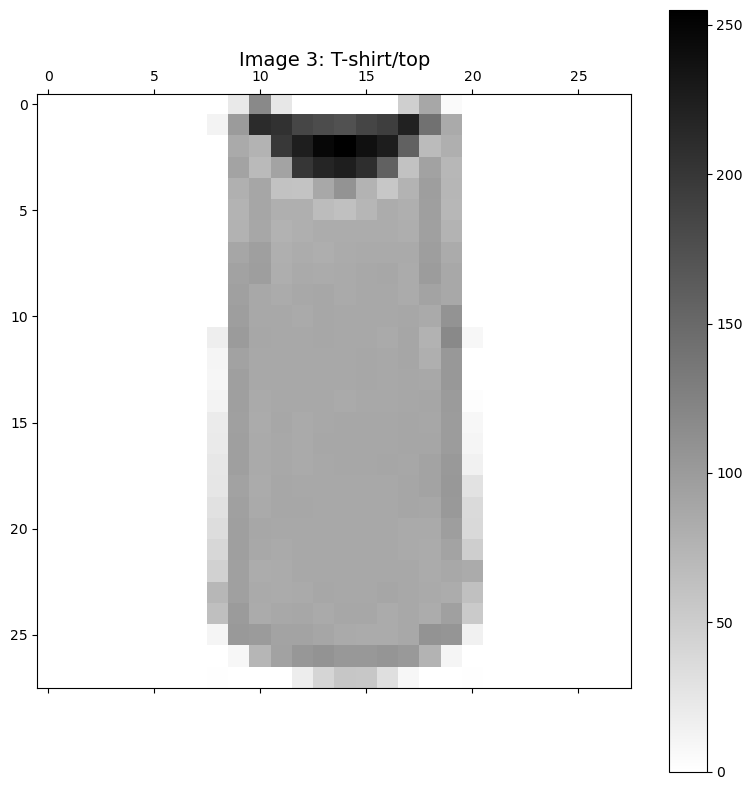

In [6]:
# Plot the first 3 images from the training set
print("👀 Here are the first 3 images from our training data:\n")

for i in range(3):
    print(f"\n{'='*50}")
    print(f"Image #{i+1}: This is a {labels[y_train[i]]}")
    print(f"Label number: {y_train[i]}")
    print(f"{'='*50}")
    
    # Plot the image
    plot_matrix(X_train[i], cm=plt.cm.binary, shape=(28, 28), 
                title=f"Image {i+1}: {labels[y_train[i]]}")

---
## 6. Task A: Random Forest Classifier (1 mark) <a name="task-a"></a>

Now it's your turn to implement and train a Random Forest classifier! 🌲

### What You Need to Do:

1. ✅ Implement a grid search function to find the best hyperparameters
2. ✅ Train a Random Forest with the best parameters
3. ✅ Evaluate its performance on the test set
4. ✅ Visualize the confusion matrix
5. ✅ Visualize the feature importance

### Step 1: Implement the Grid Search Function

**Your Task:** Complete the `grid_search` function below.

**What should this function do?**
- Try different combinations of `max_depth` and `max_features`
- For each combination, train a Random Forest and check its accuracy using the OOB score
- Find which combination gives the best accuracy

**Hyperparameters to try:**
- `max_depth`: Try [4, 12, None]
- `max_features`: Try [4, 12, 'sqrt']
- This gives us 3 × 3 = **9 combinations** to test

**Important settings:**
- Set `oob_score=True` (to get free validation score)
- Set `bootstrap=True` (required for Random Forest)
- Set `random_state=YOUR_STUDENT_ID` (for reproducibility)
- Set `n_jobs=-1` (use all CPU cores for faster training)

In [9]:
def grid_search(CLF, X_train, y_train, n_estimators=30):
    """
    Find the best hyperparameters for a Random Forest classifier.
    
    Parameters:
    - CLF: The classifier class (RandomForestClassifier)
    - X_train: Training features (images)
    - y_train: Training labels
    - n_estimators: Number of trees in the forest
    
    Returns:
    - best_oob: Best out-of-bag accuracy score
    - best_depth: Best max_depth value
    - best_features: Best max_features value
    """
    
    # Define the hyperparameter values to try
    max_depth_values = [4, 12, None]
    max_features_values = [4, 12, 'sqrt']
    
    # Variables to track the best configuration
    best_oob = 0
    best_depth = None
    best_features = None
    
    print(f"\n{'='*70}")
    print(f"🔍 Testing {CLF.__name__} with {n_estimators} trees")
    print(f"{'='*70}\n")
    
    ### YOUR CODE HERE ###
    # Hint 1: Use nested for loops to try all combinations
    # for depth in max_depth_values:
    #     for features in max_features_values:
    #         1. Create classifier: clf = CLF(...)
    #         2. Train it: clf.fit(X_train, y_train)
    #         3. Get OOB score: current_oob = clf.oob_score_
    #         4. Print the results
    #         5. Update best_oob, best_depth, best_features if this is better
    
    for depth in max_depth_values:
        for feature in max_features_values:
            clf_model = CLF(n_estimators=n_estimators, max_depth=depth, max_features=feature,
                            oob_score=True, bootstrap=True, random_state=6327, n_jobs=-1)

            clf_model.fit(X_train, y_train)

            current_oob = clf_model.oob_score_

            print("Current oob score is: ", end=" ")
            print(current_oob)

            if current_oob > best_oob:
                best_oob = current_oob
                best_depth = depth
                best_features = feature
    
    
    ### END YOUR CODE ###
    
    print(f"\n{'='*70}")
    print(f"🏆 Best configuration found!")
    print(f"   max_depth = {best_depth}")
    print(f"   max_features = {best_features}")
    print(f"   OOB Score = {best_oob:.4f} ({best_oob*100:.2f}% accuracy)")
    print(f"{'='*70}\n")
    
    return best_oob, best_depth, best_features

### Step 2: Run Grid Search for Random Forest

Now let's use your grid search function to find the best parameters!

**⚠️ Note:** This will take about 5-10 minutes to run because we're training 9 different Random Forests.

In [10]:
### YOUR CODE HERE ###
# Call the grid_search function for RandomForestClassifier with n_estimators=30
# Store the results in variables: rf_oob, rf_depth, rf_features
#
# Example:
# rf_oob, rf_depth, rf_features = grid_search(RandomForestClassifier, X_train, y_train, n_estimators=30)

rf_oob, rf_depth, rf_features = grid_search(RandomForestClassifier, X_train, y_train, n_estimators=30)

### END YOUR CODE ###


🔍 Testing RandomForestClassifier with 30 trees

Current oob score is:  0.7043666666666667
Current oob score is:  0.7257
Current oob score is:  0.7352666666666666
Current oob score is:  0.82745
Current oob score is:  0.8479333333333333
Current oob score is:  0.8575666666666667
Current oob score is:  0.8417
Current oob score is:  0.8564166666666667
Current oob score is:  0.8634666666666667

🏆 Best configuration found!
   max_depth = None
   max_features = sqrt
   OOB Score = 0.8635 (86.35% accuracy)



### Step 3: Train Final Random Forest with Best Parameters

Now that we know the best parameters, let's train a final Random Forest and test it!

In [11]:
### YOUR CODE HERE ###
# 1. Create a RandomForestClassifier with the best hyperparameters
#    Use: n_estimators=30, max_depth=rf_depth, max_features=rf_features
#    Set: random_state=YOUR_STUDENT_ID, n_jobs=-1
rf_model = RandomForestClassifier(n_estimators=30, max_depth=rf_depth, max_features=rf_features,
                                  random_state=6327, n_jobs=-1)

# 2. Train the classifier on X_train and y_train
rf_model.fit(X_train, y_train)

# 3. Make predictions on X_test
y_pred = rf_model.predict(X_test)

# 4. Calculate accuracy using accuracy_score(y_test, predictions)
acc_score = accuracy_score(y_test, y_pred)

# 5. Print the test accuracy
print("Test Accuracy is: ", end="")
print(acc_score)

### END YOUR CODE ###

Test Accuracy is: 0.8716


### Step 4: Compute and Plot Confusion Matrix

A **confusion matrix** shows us which classes our model confuses with each other.

**How to read it:**
- Rows = True labels (what the item actually is)
- Columns = Predicted labels (what our model said it is)
- Diagonal = Correct predictions ✅
- Off-diagonal = Mistakes ❌

**Example:**
```
If the cell at row "Shirt" and column "T-shirt" has a big number,
it means our model often mistakes Shirts for T-shirts!
```

Confusion Matrix is :
[[846   1  14  29   7   1  91   0  11   0]
 [  5 961   7  20   2   0   4   0   1   0]
 [ 12   0 796  10 115   0  65   0   2   0]
 [ 19   5   7 905  32   0  30   0   2   0]
 [  1   0 117  37 797   0  46   0   2   0]
 [  0   0   0   1   0 959   0  28   2  10]
 [152   2 123  30  90   0 586   0  17   0]
 [  0   0   0   0   0  16   0 950   0  34]
 [  1   2   5   2   5   2   9   3 970   1]
 [  0   0   0   0   0  10   2  41   1 946]]


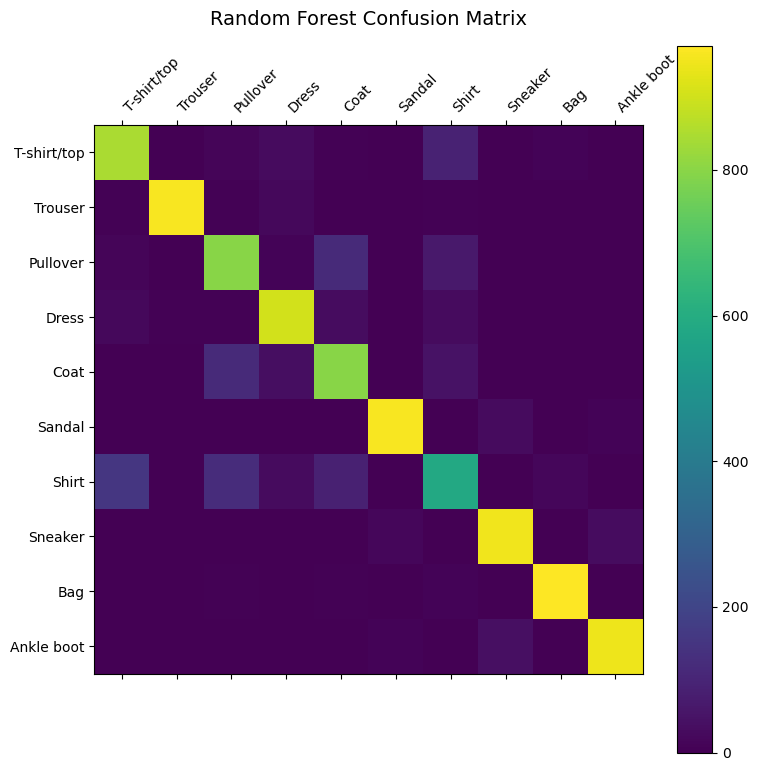

In [12]:
### YOUR CODE HERE ###
# 1. Compute the confusion matrix using: confusion_matrix(y_test, predictions)
#    Store it in a variable called 'cm'
cm = confusion_matrix(y_test, y_pred)

# 2. Print the confusion matrix
print("Confusion Matrix is :")
print(cm)

# 3. Plot it using: plot_matrix(cm, target_names=labels, title="Random Forest Confusion Matrix")
plot_matrix(cm, target_names=labels, title="Random Forest Confusion Matrix")

### END YOUR CODE ###

### Step 5: Visualize Feature Importance

**Feature importance** tells us which pixels are most useful for classification!

**What you'll see:**
- Bright areas = Important pixels (the model looks at these a lot)
- Dark areas = Less important pixels

This can help us understand what the model "looks at" when classifying clothes!

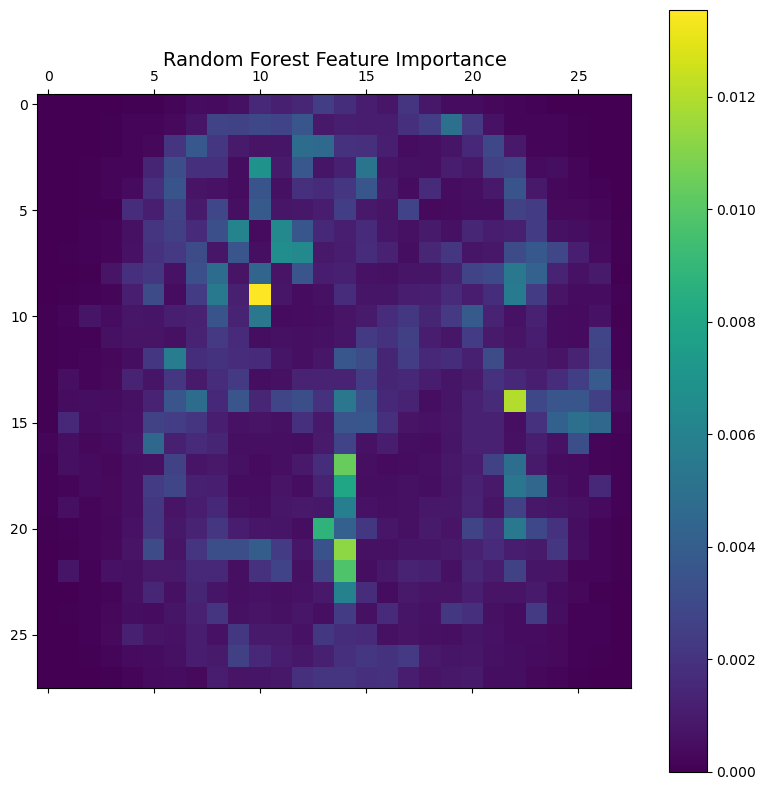

In [13]:
### YOUR CODE HERE ###
# 1. Get feature importances from your trained Random Forest
#    Use: feature_imp = YOUR_RF_CLASSIFIER.feature_importances_
feature_imp = rf_model.feature_importances_

# 2. Plot it as a 28x28 image using:
#    plot_matrix(feature_imp, shape=(28, 28), title="Random Forest Feature Importance")
plot_matrix(feature_imp, shape=(28, 28), title="Random Forest Feature Importance")


### END YOUR CODE ###

---
## 7. Task B: AdaBoost Classifier (1 mark) <a name="task-b"></a>

Now let's try AdaBoost! Remember, AdaBoost learns from its mistakes sequentially. 🎯

### What You Need to Do:

1. ✅ Train an AdaBoost classifier with 300 weak learners
2. ✅ Track how accuracy improves as we add more learners
3. ✅ Plot the training and test accuracy curves
4. ✅ Evaluate performance with confusion matrix
5. ✅ Visualize feature importance

### Step 1: Train AdaBoost and Track Performance

**Important:** Training AdaBoost with 300 estimators will take **15-30 minutes**! ⏰

**What we'll do:**
- Train AdaBoost with 300 weak learners
- Use `staged_score()` to see accuracy after adding each learner
- This helps us see if more learners actually help!

**Note:** You do NOT need to do grid search for AdaBoost. Just use the default settings!

In [14]:
print("🎯 Training AdaBoost with 300 estimators...")
print("⏰ This will take 15-30 minutes. Be patient!\n")

### YOUR CODE HERE ###
# 1. Create an AdaBoostClassifier with n_estimators=300
#    Set random_state=YOUR_STUDENT_ID
#    Example: ada_clf = AdaBoostClassifier(n_estimators=300, random_state=YOUR_ID)
ab_model = AdaBoostClassifier(n_estimators=300, random_state=6327)

# 2. Train it on the training data
#    Example: ada_clf.fit(X_train, y_train)
ab_model.fit(X_train, y_train)

# 3. Get training scores for each stage (after adding each estimator)
#    Use: train_scores = list(ada_clf.staged_score(X_train, y_train))
train_scores = list(ab_model.staged_score(X_train, y_train))

# 4. Get test scores for each stage
#    Use: test_scores = list(ada_clf.staged_score(X_test, y_test))
test_scores = list(ab_model.staged_score(X_test, y_test))

### END YOUR CODE ###

print("\n✅ AdaBoost training complete!")
print(f"Final training accuracy: {train_scores[-1]:.4f} ({train_scores[-1]*100:.2f}%)")
print(f"Final test accuracy: {test_scores[-1]:.4f} ({test_scores[-1]*100:.2f}%)")

🎯 Training AdaBoost with 300 estimators...
⏰ This will take 15-30 minutes. Be patient!



f:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



✅ AdaBoost training complete!
Final training accuracy: 0.6290 (62.91%)
Final test accuracy: 0.6154 (61.54%)


### Step 2: Plot Training and Test Accuracy Over Time

Let's visualize how AdaBoost's performance changes as we add more weak learners!

**What to look for:**
- Does accuracy keep improving? 📈
- Does it plateau (stop improving)? ➡️
- Is there overfitting (training accuracy much higher than test)? ⚠️

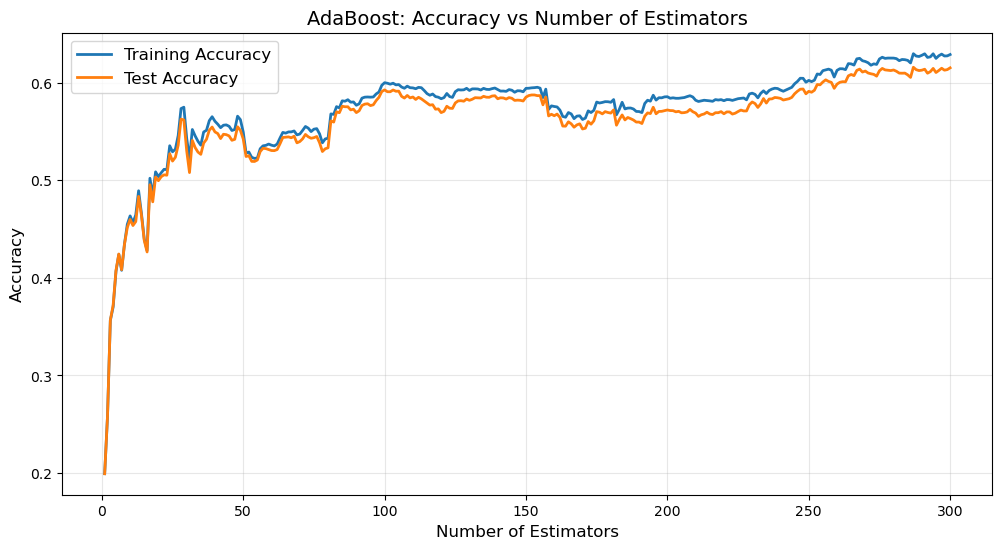

In [15]:
### YOUR CODE HERE ###
# Create a plot showing how accuracy changes with number of estimators
#
# 1. Create x-axis: estimator_range = range(1, 301)  # 1 to 300
estimator_range = range(1, 301)

# 2. Create the plot:
plt.figure(figsize=(12, 6))
plt.plot(estimator_range, train_scores, label='Training Accuracy', linewidth=2)
plt.plot(estimator_range, test_scores, label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('AdaBoost: Accuracy vs Number of Estimators', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



### END YOUR CODE ###

### Step 3: Compute and Plot Confusion Matrix for AdaBoost

Accuracy Score is: 0.6154
Confusion matrix is:
[[335  39 219 242  22   0 129   0  14   0]
 [  9 853  14 120   1   0   2   0   1   0]
 [ 73   2 641  24 176   0  79   0   5   0]
 [  8 147  75 726  21   0  17   0   5   1]
 [ 16   3 391 102 434   0  43   0  11   0]
 [  0   0   0   1   0 589   0 364  13  33]
 [103  20 362 146 186   0 165   0  18   0]
 [  0   0   0   0   0  16   0 975   0   9]
 [ 50   2  14   7   4   8  17  29 856  13]
 [  0   0   0   0   0  18   0 399   3 580]]


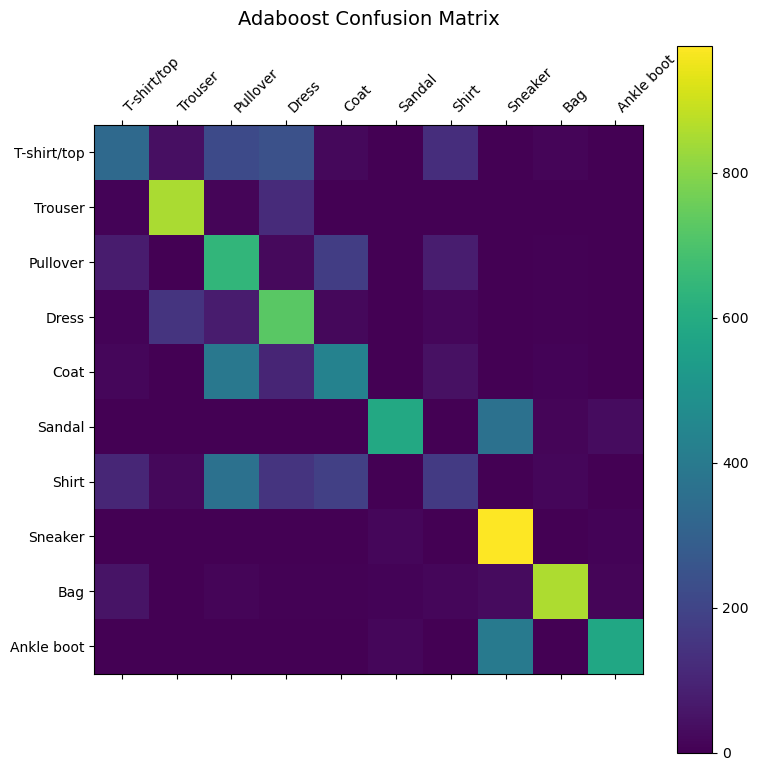

In [16]:
### YOUR CODE HERE ###
# 1. Make predictions on test set using your trained AdaBoost classifier
y_pred = ab_model.predict(X_test)

# 2. Compute accuracy and print it
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is: ", end="")
print(acc_score)

# 3. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Print and plot the confusion matrix
print("Confusion matrix is:")
print(cm)

plot_matrix(cm, target_names=labels, title="Adaboost Confusion Matrix")


### END YOUR CODE ###

### Step 4: Visualize AdaBoost Feature Importance

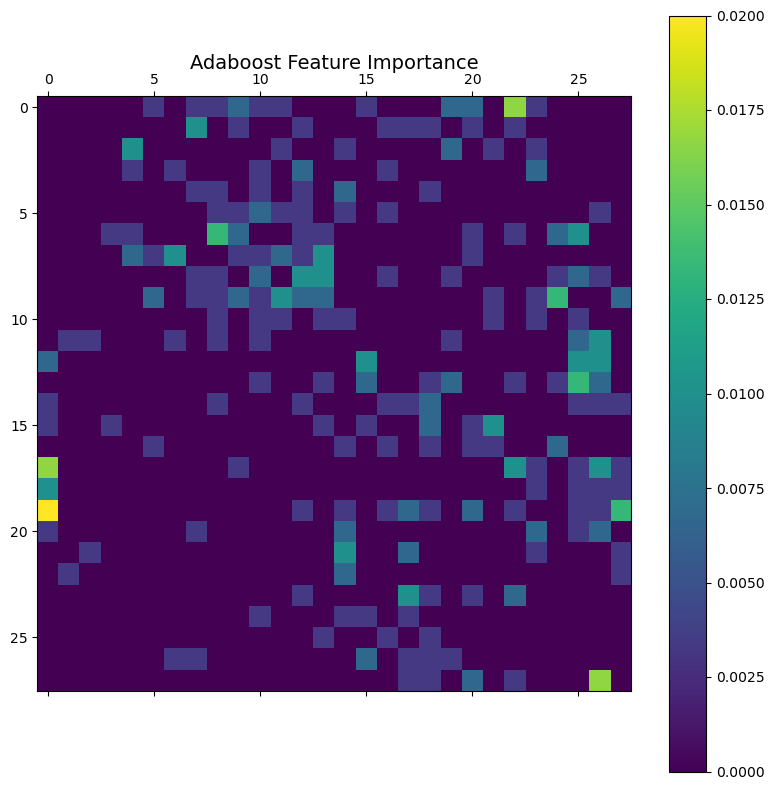

In [18]:
### YOUR CODE HERE ###
# 1. Get feature importances from AdaBoost
feature_imp = ab_model.feature_importances_

# 2. Plot it as a 28x28 image
plot_matrix(feature_imp, shape=(28, 28), title="Adaboost Feature Importance")


### END YOUR CODE ###

---
## 8. Discussion Questions (1 mark) <a name="discussion"></a>

Now let's think about what we learned! Answer these questions in detail. 🤔

### Question a) Which classifier is most accurate?

Compare the test accuracy of:
- Random Forest (30 trees)
- AdaBoost (300 estimators)

**Your Answer:**
Accuracy of random forest: 0.8716 <br>
Accuracy of adaboost: 0.6154 <br>
So random forest is more accurate.

### Question b) Confusion Matrix Analysis

Look at the confusion matrices for both classifiers.

**Answer these:**
1. Which pairs of clothing items get confused with each other most often?
   - For example: "Shirts are often confused with T-shirts"
2. Are the confused pairs the same for both classifiers (Random Forest and AdaBoost)?
3. **Think deeply:** WHY might these items be confused? 
   - Think about how they look visually!
   - Example: "Shirts and T-shirts both have similar shapes..."

**Your Answer:**

[Write your detailed answer here]

### Question c) Feature Importance Analysis for Random Forest

Look at the feature importance image from Random Forest.

**Answer these:**
1. Where are the bright spots (important features) located in the 28×28 image?
   - Are they at the center? Edges? Top? Bottom?
2. Does the pattern make sense?
   - Think: Where would you look to distinguish clothes?
3. Is there a connection between the important features and the classes that get confused?
   - Example: "If the model only looks at the top, it might confuse shirts and t-shirts..."

**Your Answer:**

[Write your detailed answer here]

### Question d) AdaBoost Analysis

Look at all your AdaBoost results:

**Answer these:**

1. **Training/Test Curve:** What happens to the test accuracy as you add more estimators?
   - Does it keep improving?
   - Does it plateau (stay flat)?
   - Does it start getting worse (overfitting)?

2. **Confusion Matrix:** How does AdaBoost's confusion matrix compare to Random Forest's?
   - Are the mistakes similar or different?

3. **Feature Importance:** How is AdaBoost's feature importance different from Random Forest's?
   - Does it look similar or completely different?
   - Is it more "noisy" or more "smooth"?

4. **Big Question:** Based on what you see, does feature importance always give us useful information?
   - Can we always trust it?
   - When might it be misleading?

**Your Answer:**

[Write your detailed answer here]

---

### 📤 Submission Instructions:

1. **Save this notebook** (make sure all cells are run!)
2. **Upload the .html file** to the course submission system
3. **Deadline:** Monday, December 01, 23:59 pm
4. **If working in pairs:** BOTH students must submit a copy

---

## Good luck! 🎉🌟

**Remember:** Machine learning is about understanding, not just getting high accuracy. Take time to think about the "why" behind your results! 🧠✨